# INTRODUÇÃO

No ambiente corporativo, a rotatividade de colaboradores representa uma diminuição inesperada na força de trabalho. Empresas com índices elevados de rotatividade de colaboradores frequentemente encaram o risco de esgotamento dos recursos internos.

Este projeto elege a rotatividade de pessoal como tema central, utilizando um conjunto de dados específico com o propósito de:

* Analisar os principais elementos que impactam a rotatividade de colaboradores.
* Detectar padrões ou tendências nos dados relacionados à rotatividade de pessoal.
* Fornecer insights acionáveis para a gestão de recursos humanos, visando à redução da rotatividade de colaboradores.
* Elaborar e implementar medidas estratégicas para aprimorar a retenção de talentos na organização.

| Num | Nome das Colunas     | Dicionário das Variáveis                                                        |
|-----|----------------------|--------------------------------------------------------------------|
| 1   | Age                  | Idade do funcionário                                               |
| 2   | Gender               | Gênero do funcionário                                              |
| 3   | BusinessTravel       | Frequência de viagens a negócios dos funcionários                  |
| 4   | DailyRate            | Salário diário dos funcionários                                    |
| 5   | Department           | Departamento dos funcionários                                      |
| 6   | DistanceFromHome     | Distância de casa para o trabalho em milhas                        |
| 7   | Education            | Nível de educação alcançado pelos funcionários                     |
| 8   | EducationField       | Área de estudo dos funcionários                                    |
| 9   | EmployeeCount        | Número total de funcionários na organização                        |
| 10  | EmployeeNumber       | Identificador único para cada registro de funcionário              |
| 11  | EnvironmentSatisfaction | Satisfação do funcionário com o ambiente de trabalho            |
| 12  | HourlyRate           | Salário por hora dos funcionários                                  |
| 13  | JobInvolvement       | Nível de envolvimento necessário para o trabalho do funcionário    |
| 14  | JobLevel             | Nível de trabalho do funcionário                                   |
| 15  | JobRole              | Cargo dos funcionários na organização                              |
| 16  | JobSatisfaction      | Satisfação do funcionário com o trabalho                           |
| 17  | MaritalStatus        | Estado civil do funcionário                                        |
| 18  | MonthlyIncome        | Renda mensal do funcionário                                        |
| 19  | MonthlyRate          | Taxa salarial mensal dos funcionários                              |
| 20  | NumCompaniesWorked   | Número de empresas para as quais o funcionário trabalhou           |
| 21  | Over18               | Se o funcionário tem mais de 18 anos                               |
| 22  | OverTime             | Se os funcionários trabalham horas extras                          |
| 23  | PercentSalaryHike    | Taxa de aumento salarial para os funcionários                      |
| 24  | PerformanceRating    | Avaliação de desempenho do funcionário                             |
| 25  | RelationshipSatisfaction | Satisfação do funcionário com seus relacionamentos             |
| 26  | StandardHours        | Horário padrão de trabalho para os funcionários                    |
| 27  | StockOptionLevel     | Nível de opção de ações dos funcionários                           |
| 28  | TotalWorkingYears    | Número total de anos que o funcionário trabalhou                   |
| 29  | TrainingTimesLastYear | Número de vezes que os funcionários foram treinados no último ano |
| 30  | WorkLifeBalance      | Percepção dos funcionários sobre equilíbrio entre trabalho e vida pessoal |
| 31  | YearsAtCompany       | Número de anos que os funcionários estiveram na empresa            |
| 32  | YearsInCurrentRole   | Número de anos que o funcionário esteve em sua função atual        |
| 33  | YearsSinceLastPromotion | Número de anos desde a última promoção do funcionário           |
| 34  | YearsWithCurrManager | Número de anos que um funcionário esteve com seu gerente atual     |
| 35  | Attrition            | Se o funcionário deixou a organização                              |

In [35]:
# pip install dash

from dash import Dash, dcc, html, Input, Output


## IMPORTANDO AS BIBLIOTECAS

In [36]:

# Bibliotecas para tratar dados
import pandas as pd # data processing
import numpy as np # linear algebra

# Bibliotecas para EDA 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import plotly.io as pio
pio.renderers.default = "browser"
from dash import Dash, dcc, html, Input, Output

# Configurar para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Configurar para exibir todas as colunas de um DataFrame do Pandas
pd.set_option("display.max_columns", None)

## IMPORTANDO OS DADOS

In [2]:
dados = pd.read_csv('HR-Employee-Attrition.csv', sep=';')
dados.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Associates Degree,Life Sciences,1,1.0,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,Y,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,R&D,8,High School,Life Sciences,1,2.0,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,Y,23,4,4,80,1,10,3,3,10,7,1,7


Veja que os dados dizem respeito a profissionais da IBM, de diversas áreas (Department), com diversas formações (EducationField), que deixaram ou não (Attrition) a empresa.

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2925 non-null   int64  
 1   Attrition                 2925 non-null   object 
 2   BusinessTravel            2925 non-null   object 
 3   DailyRate                 2925 non-null   int64  
 4   Department                2925 non-null   object 
 5   DistanceFromHome          2925 non-null   int64  
 6   Education                 2925 non-null   object 
 7   EducationField            2925 non-null   object 
 8   EmployeeCount             2925 non-null   int64  
 9   EmployeeNumber            2924 non-null   float64
 10  EnvironmentSatisfaction   2925 non-null   int64  
 11  Gender                    2925 non-null   object 
 12  HourlyRate                2925 non-null   int64  
 13  JobInvolvement            2925 non-null   int64  
 14  JobLevel

In [4]:
print(f"O dataframe possui {dados.shape[0]} linhas e {dados.shape[1]} colunas.")

O dataframe possui 2925 linhas e 35 colunas.


In [5]:
# Removendo colunas que não iremos utilizar, portanto, não afetam o resultado final da análise

dados.drop(['EmployeeCount', 'Over18', 'StandardHours','DailyRate','HourlyRate','NumCompaniesWorked','StockOptionLevel','YearsInCurrentRole','YearsWithCurrManager'], axis=1, inplace=True)

In [6]:
# Verificando se possuimos dados nulos
dados.isna().values.any()

True

In [7]:
# Vericando se possuimos dados repetidos
dados.duplicated().any().sum()

0

Não possuímos dados faltantes em nossos dados. E, além disso, temos bastantes colunas, de todos os tipos, para explorarmos bem os dados.

## EXPLORANDO OS DADOS

Para uma análise explotória inicial dos dados, faremos algumas observações em variavéis númericas e categóricas. 

In [8]:
# Colunas numéricas e método describe
numericas = dados.select_dtypes(include=('int64','float64'))

dados_describe = numericas.describe()

# Criando novas medidas dentro do describe utilizando o .loc
dados_describe.loc['amp'] = dados_describe.loc['max'] - dados_describe.loc['min'] ## amplitude dos dados
dados_describe.loc['cv'] = (dados_describe.loc['std'] / dados_describe.loc['mean']).abs() * 100 # coeficiente de variação em percentual 

# Visualizando em transpose devido a grande quantidade de variáveis
dados_describe.round(2).T

,count,mean,std,min,25%,50%,75%,max,amp,cv
Age,2925.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0,42.0,24.76
DistanceFromHome,2925.0,9.17,8.09,1.0,2.00,7.0,14.00,29.0,28.0,88.20
EmployeeNumber,2924.0,1811.42,946.24,1.0,1015.75,1954.0,2602.25,3333.0,3332.0,52.24
EnvironmentSatisfaction,2925.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0,3.0,40.12
JobInvolvement,2925.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0,3.0,26.05
JobLevel,2925.0,2.07,1.11,1.0,1.00,2.0,3.00,5.0,4.0,53.60
JobSatisfaction,2925.0,2.73,1.10,1.0,2.00,3.0,4.00,4.0,3.0,40.44
MonthlyIncome,2925.0,6513.81,4713.70,1009.0,2911.00,4936.0,8381.00,19999.0,18990.0,72.36
MonthlyRate,2925.0,14322.17,7128.77,2094.0,8040.00,14242.0,20471.00,26999.0,24905.0,49.77
PercentSalaryHike,2925.0,15.22,3.66,11.0,12.00,14.0,18.00,25.0,14.0,24.04


Com o método descibre, podemos ter alguns insights sobre os dados. Como:
- Variáveis que medem a satisfação dos funcionários possuem range de 1-4, portanto, podemos transformá-las em categóricas.
- Além dessa, temos algumas outras variáveis que podem apresentar insights mais relevantes se transformarmos em categóricas. 
- Variação salarial bem alta em relação aos funcionários, bem como seus anos na empresa. 

Os índices de satisfação dos funcionários são informações muito relevantes em uma análise de rotatividade de recursos internos. 
Portanto, categorizaremos de forma que facilite a compreensão visual de tais indicadores.

In [9]:
# Medidas de satisfação dos funcionários
def categoria_satisfacao(nota):
    if nota == 1.0:
        return 'Very Satisfied'
    elif nota == 2.0:
        return 'Satisfied'
    elif nota == 3.0:
        return 'Dissatisfied'
    else:
        return 'Very Dissatisfied'

dados['EnvironmentSatisfaction'] = dados['EnvironmentSatisfaction'].apply(categoria_satisfacao)
dados['JobSatisfaction'] = dados['JobSatisfaction'].apply(categoria_satisfacao)
dados['WorkLifeBalance'] = dados['WorkLifeBalance'].apply(categoria_satisfacao)
dados['RelationshipSatisfaction'] = dados['RelationshipSatisfaction'].apply(categoria_satisfacao)
dados['JobInvolvement'] = dados['JobInvolvement'].apply(categoria_satisfacao)

In [10]:
dados[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction','JobInvolvement']].apply(pd.unique)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,RelationshipSatisfaction,JobInvolvement
0,Satisfied,Very Dissatisfied,Very Satisfied,Very Satisfied,Dissatisfied
1,Dissatisfied,Satisfied,Dissatisfied,Very Dissatisfied,Satisfied
2,Very Dissatisfied,Dissatisfied,Satisfied,Satisfied,Very Dissatisfied
3,Very Satisfied,Very Satisfied,Very Dissatisfied,Dissatisfied,Very Satisfied


Com as devidas alterações, vamos dar uma olhada em nossas variáveis categóricas. 

In [11]:
# Colunas cetagoricas
categoricas = dados.select_dtypes(exclude=('int64','float64'))

# Contagem de numericas x categoricas
print(f"Temos {numericas.shape[1]} colunas numéricas e {categoricas.shape[1]} colunas categóricas.")

Temos 17 colunas numéricas e 14 colunas categóricas.


In [12]:
# Valores únicos de variáveis categoricas
for i in categoricas:
    print(f'Valores únicos:{i, set(dados[i])}')

Valores únicos:('Attrition', {'Yes', 'No'})
Valores únicos:('BusinessTravel', {'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'})
Valores únicos:('Department', {'R&D', 'HR', 'Sales'})
Valores únicos:('Education', {"Bachelor's Degree", "Master's Degree", 'High School', 'Doctoral Degree', 'Associates Degree'})
Valores únicos:('EducationField', {'Marketing', 'Human Resources', 'Other', 'Life Sciences', 'Technical Degree', 'Medical'})
Valores únicos:('EnvironmentSatisfaction', {'Very Satisfied', 'Dissatisfied', 'Very Dissatisfied', 'Satisfied'})
Valores únicos:('Gender', {'Male', 'Female'})
Valores únicos:('JobInvolvement', {'Satisfied', 'Very Dissatisfied', 'Very Satisfied', 'Dissatisfied'})
Valores únicos:('JobRole', {'Sales Representative', 'Human Resources', 'Research Director', 'Research Scientist', 'Laboratory Technician', 'Sales Executive', 'Healthcare Representative', 'Manufacturing Director', 'Manager'})
Valores únicos:('JobSatisfaction', {'Very Satisfied', 'Very Dissatisfied', 

## Análise Univariada

Como uma demanda no departamento de RH é uma análise de ex-funcionários e funcionários ativos, foi realizado um dashboard em PowerBi somente com a visualização de ex-funcionários. 

Para esta análise trabalharemos com um dataframe que representa ambos os grupos e um dataframe somente para olharmos os funcionários ativos. 

In [13]:
# renomeando a coluna 'atrition' para o status onde 'Yes' será renomeado para 'Ex-Employee' e 'No' para 'Current Employee'
dados['Attrition'] = dados['Attrition'].replace({'Yes': 'Ex-Employee', 'No': 'Current Employee'})

# apenas os funcionários atuais
dados_funcionarios = dados.loc[dados['Attrition'] == 'Current Employee']

# apenas os funcionários atuais
dados_ex_funcionarios = dados.loc[dados['Attrition'] == 'Ex-Employee']

Na tabela abaixo obtemos uma visão agrupada dos ex-funcionários da empresa, os números destacados em amarelo representam grupos com a taxa superior a 5% de attrition. 

In [14]:
# Cálculos de frequência e agrupamento dos dados
frequencia = dados_ex_funcionarios.groupby(['Department', 'Gender', 'MaritalStatus'])['EmployeeNumber'].agg('count')

relativa = ((frequencia / frequencia.sum()))*100

df_relativa = pd.DataFrame(relativa).reset_index().rename(columns={'EmployeeNumber': 'RelativeFrequency'})

# aplicando a formatação condicional aos valores do dataframe que são superior a 5%
df_relativa = df_relativa.style.applymap(
    lambda x: f'color: {"khaki" if x > 5.0 else "lightgray"}', 
    subset=pd.IndexSlice[:, 'RelativeFrequency']).format({
        'RelativeFrequency': '{:.2f} %'})

# Exibe o DataFrame estilizado
df_relativa

,Department,Gender,MaritalStatus,RelativeFrequency
0,HR,Female,Divorced,1.22 %
1,HR,Female,Married,1.22 %
2,HR,Male,Divorced,0.81 %
3,HR,Male,Married,1.22 %
4,HR,Male,Single,0.41 %
5,R&D,Female,Divorced,2.04 %
6,R&D,Female,Married,7.74 %
7,R&D,Female,Single,8.96 %
8,R&D,Male,Divorced,6.72 %
9,R&D,Male,Married,13.24 %


In [15]:
# Representação em percentual dos funcionários ativos e ex-funcionários 
percentual_attrition = dados['Attrition'].value_counts(normalize=True) * 100

fig = go.Figure()

# Gráfico de barras
fig.add_trace(go.Bar(
    x=percentual_attrition.index,
    y=percentual_attrition.values,
    marker_color=['thistle', 'lightseagreen'],  # Definindo a cor das barras
    text=[f'{val:.2f}%' for val in percentual_attrition.values],  # Adicionando texto nas barras
    textposition='outside'))

# Configurando layout do gráfico
fig.update_layout(
    title='Proporção de Funcionários e Ex-Funcionários',
    title_x=0.5,  # Centralizando o título principal
    title_font=dict(size=16),  # Aumentando o tamanho do título
    width=800,  # Ajustando a largura do gráfico
    height=500,  # Ajustando a altura do gráfico
    plot_bgcolor='rgba(0,0,0,0)')  # Definindo o espaço entre as barras

# Anotações 
fig.add_annotation(
    x=1, 
    y=percentual_attrition.mean(),
    text="<b>16%</b> dos dados representam ex-funcionários<br><b>alta taxa de rotatividade",
    font=dict(size=11),
    align='center'
)
fig.show()


In [37]:
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd

# Vamos supor que você tenha os dados já carregados em 'dados'

# Representação em percentual dos funcionários ativos e ex-funcionários 
percentual_attrition = dados['Attrition'].value_counts(normalize=True) * 100

fig = go.Figure()

# Gráfico de barras
fig.add_trace(go.Bar(
    x=percentual_attrition.index,
    y=percentual_attrition.values,
    marker_color=['thistle', 'lightseagreen'],  # Definindo a cor das barras
    text=[f'{val:.2f}%' for val in percentual_attrition.values],  # Adicionando texto nas barras
    textposition='outside'))

# Configurando layout do gráfico
fig.update_layout(
    title='Proporção de Funcionários e Ex-Funcionários',
    title_x=0.5,  # Centralizando o título principal
    title_font=dict(size=16),  # Aumentando o tamanho do título
    width=800,  # Ajustando a largura do gráfico
    height=500,  # Ajustando a altura do gráfico
    plot_bgcolor='rgba(0,0,0,0)')  # Definindo o espaço entre as barras

# Anotações 
fig.add_annotation(
    x=1, 
    y=percentual_attrition.mean(),
    text="<b>16%</b> dos dados representam ex-funcionários<br><b>alta taxa de rotatividade",
    font=dict(size=11),
    align='center'
)

# Criando a aplicação Dash
app = dash.Dash(__name__)

# Layout da aplicação
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

# Executando a aplicação
if __name__ == '__main__':
    app.run_server(debug=True)

O gráfico acima nos mostra que 16% da nossa base de dados representam ex-funcionários, o que é considerada uma taxa alta de rotatividade. 

Vamos olhar os índices de satisfação dos funcionários atuais para tentarmos entender os motivos de tamanha rotatividade.

In [16]:
# Distribuição da Satisfação dos Funcionários

fig = go.Figure()

# Adicionando barras para funcionários atuais
fig.add_trace(go.Bar(
    x=dados_funcionarios['JobSatisfaction'].value_counts(normalize=True).index,
    y=dados_funcionarios['JobSatisfaction'].value_counts(normalize=True)*100,
    marker_color='thistle',
    name='Funcionários'
))

# Adicionando barras para ex-funcionários
fig.add_trace(go.Bar(
    x=dados_ex_funcionarios['JobSatisfaction'].value_counts(normalize=True).index,
    y=dados_ex_funcionarios['JobSatisfaction'].value_counts(normalize=True)*100,
    marker_color='lightseagreen',
    name='Ex-Funcionários'
))

# Configurando layout do gráfico
fig.update_layout(
    title='Satisfação Geral dos Funcionários',
    title_x=0.5,
    title_font=dict(size=16), 
    barmode='group',
    width=1000,  
    height=500, 
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0.02  
    )
)

# Adicionando anotação
fig.add_annotation(
    x=2.2, 
    y=32,
    text="Mais de <b>60%</b> dos funcionários <br> estão <b>muito insatisfeitos<br></b>ou insatisfeitos de modo geral",
    showarrow=False,
    font=dict(size=12),
    align='center'
)

# Atualizando eixo y
fig.update_yaxes(title="Em percentual (%)")

# Exibindo o gráfico
fig.show()



In [17]:
# Distribuição da Satisfação dos Funcionários com o Equilíbrio de Trabalho e Vida Pessoal

fig = go.Figure()

fig.add_trace(go.Bar(
    x=dados_funcionarios['WorkLifeBalance'].value_counts(normalize=True).index,
    y=dados_funcionarios['WorkLifeBalance'].value_counts(normalize=True)*100,
    marker_color='thistle',
    name='Funcionários'
))

fig.add_trace(go.Bar(
    x=dados_ex_funcionarios['WorkLifeBalance'].value_counts(normalize=True).index,
    y=dados_ex_funcionarios['WorkLifeBalance'].value_counts(normalize=True)*100,
    marker_color='lightseagreen',
    name='Ex-Funcionários'
))

fig.update_layout(
    title='Equilíbrio de Trabalho e Vida Pessoal',
    title_x=0.5,  
    title_font=dict(size=16),  
    barmode='group',
    width=1000, 
    height=500,  
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0.02  
    ))

fig.add_annotation(
    x=2.5, 
    y=50,
    text="A <b>insatisfação</b> com o equilíbrio de trabalho é ainda maior,<br>representando mais de <b>70% dos funcionários.</b><br>",
    showarrow=False,
    font=dict(size=12),
    align='center'
)

fig.update_yaxes(title="Em percentual (%)") # atualizando eixo y

fig.show()

In [18]:
# Distribuição da Satisfação dos Funcionários  com o Ambiente de Trabalho

fig = go.Figure()

fig.add_trace(go.Bar(
    x=dados_funcionarios['EnvironmentSatisfaction'].value_counts(normalize=True).index,
    y=dados_funcionarios['EnvironmentSatisfaction'].value_counts(normalize=True)*100,
    marker_color='thistle',
    name='Funcionários'
))

fig.add_trace(go.Bar(
    x=dados_ex_funcionarios['EnvironmentSatisfaction'].value_counts(normalize=True).index,
    y=dados_ex_funcionarios['EnvironmentSatisfaction'].value_counts(normalize=True)*100,
    marker_color='lightseagreen',
    name='Ex-Funcionários'
))

fig.update_layout(
    title='Satisfação com o Ambiente de Trabalho',
    title_x=0.5,  
    title_font=dict(size=16), 
    barmode='group',
    width=1000,  
    height=500,
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0.02  
    ))

fig.add_annotation(
    x=2.2, 
    y=35,
    text="A <b>insatisfação</b> com o ambiente <br>abrange <b>60%</b> e aumenta os <br>funcionários <b>muito insatisfeitos",
    showarrow=False,
    font=dict(size=12),
    align='center'
)

fig.update_yaxes(title="Em percentual (%)")

fig.show()

In [19]:
# Distribuição da treinamentos realizados no último ano

fig = go.Figure()

fig.add_trace(go.Bar(
    x=dados_funcionarios['TrainingTimesLastYear'].value_counts(normalize=True).index,
    y=dados_funcionarios['TrainingTimesLastYear'].value_counts(normalize=True)*100,
    marker_color='thistle',
    name='Funcionários'
))

fig.add_trace(go.Bar(
    x=dados_ex_funcionarios['TrainingTimesLastYear'].value_counts(normalize=True).index,
    y=dados_ex_funcionarios['TrainingTimesLastYear'].value_counts(normalize=True)*100,
    marker_color='lightseagreen',
    name='Ex-Funcionários'
))

fig.update_layout(
    title='Número de Treinamentos no Último Ano',
    title_x=0.5, 
    title_font=dict(size=16),  
    barmode='group',
    width=1000,
    height=500, 
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0.02  
))

fig.add_annotation(
    x=5.3, 
    y=35,
    text="Com o <b>aumento de treinamentos</b>,<br>a representatividade de <b>ex-funcionários <br>declina</b> consideravelmente.",
    showarrow=False,
    font=dict(size=12),
    align='center')

fig.update_yaxes(title="Em percentual (%)")

fig.show()


Quanto as análises univariadas, podemos perceber um baixo índice de satisfação dos funcionários atuais. Sendo a opção 'dissatisfied' a com maior frequência nos índices. 

Em alguns indicadores, os funcionários estão mais insatisfeitos do que funcionários que deixaram a empresa. 

Além disso, o aumento de treinamentos declina a quantidade de ex-funcionários consideravelmente. Investir em treinamentos pode ser uma boa estratégia para retenção de talentos.

### Análise com Indicadores de Rendas 

In [20]:
# Funil de renda para a média salarial por Nível de Educação

income_education = dados_funcionarios.groupby('Education')['MonthlyIncome'].mean().reset_index()

income_education = income_education.sort_values(by='MonthlyIncome', ascending=False).round()


fig = px.funnel(income_education, 
             x='MonthlyIncome', 
             y='Education',
             color_discrete_sequence=['lightseagreen'])  

fig.update_layout(
    title='Renda Média por Nível de Educação',
    xaxis_title='',  
    yaxis_title='', 
    plot_bgcolor='rgba(0,0,0,0)',
    width=900, 
    height=500,
    title_x=0.5
    )

fig.show()

A variação de salário médio apresenta uma crescida proporcional ao aumento do nível de educação. 

In [21]:
# Violino e boxplots para a distribuição de Renda por Gênero
fig = px.violin(dados_funcionarios, 
             x='Gender', 
             y='MonthlyIncome', 
             color='Gender',
             color_discrete_map={'Male': 'lightskyblue', 'Female': 'thistle'},
             box=True) # boxplot dentro do violino

# Personalizando o layout do gráfico
fig.update_layout(
    title='Distribuição de Renda por Gênero',
    yaxis_title='Renda Mensal',
    xaxis_title='',
    plot_bgcolor='rgba(0,0,0,0)',
    width=1000, 
    height=500,
    title_x=0.5,
    showlegend=False)

# Exibindo o gráfico
fig.show()

A distribuição salarial é bem equiparada entre os sexos. 

In [22]:
# Boxplot para a distribuição de Renda por Gênero

cores_departamentos = {
    'Life Sciences':'turquoise', 'Other':'turquoise', 'Marketing':'turquoise', 'Medical':'turquoise',
    'Technical Degree': 'turquoise', 'Human Resources':'darkcyan' }

fig = px.box(dados_funcionarios,
             x="EducationField",
             y="MonthlyIncome",
             color="EducationField",
             color_discrete_map=cores_departamentos)  

fig.update_layout(
    title="Distribuição de Renda por Área de Estudos",
    xaxis_title="Área de Estudos",
    yaxis_title="Renda",
    plot_bgcolor='rgba(0,0,0,0)', 
    width=1000, 
    height=500,
    title_x=0.5,
    showlegend=False)

fig.show()

Os funcionários que estão na área de Recursos Humanos possuem a maior variação salarial perante aos demais setores.

In [23]:
# Distribuição de Renda por Departamento

cores_departamentos = {
    'HR': 'darkcyan',
    'R&D': 'thistle',
    'Sales': 'lightsalmon'}

fig = px.box(dados_funcionarios,
             x="Department",
             y="MonthlyIncome",
             color="Department",
             color_discrete_map=cores_departamentos)

fig.update_layout(
    title="Distribuição de Renda por Departamento",
    xaxis_title="Departamento",
    yaxis_title="Renda",
    plot_bgcolor='rgba(0,0,0,0)',  
    width=1000, 
    height=500,
    title_x=0.5,
    showlegend=False)

fig.show()

In [24]:
# Distribuição realizando a comparação de idades dos funcionários e anos de trabalho

fig = px.scatter(dados_funcionarios, 
                 x="Age", 
                 y="TotalWorkingYears", 
                 color="Department",
                 color_discrete_map=cores_departamentos,
                 size='TotalWorkingYears',
                 hover_name='EducationField',log_x=True) 

# Personalizando o layout do gráfico
fig.update_layout(
    title="Idade vs Anos de Trabalho",
    xaxis_title="Idade",
    yaxis_title="Anos de Trabalho",
    plot_bgcolor='rgba(0,0,0,0)',  # Cor de fundo do gráfico
    width=1000, 
    height=500,
    title_x=0.5)

fig.show()

Os profissionais do departamento de Vendas possuem a distribuição bem ampla, entretanto, são os profissionais com a maior representatividade na faixa até 45 anos. Enquanto o departamento de Research & Development são os profissionais que possuem mais representação em faixas etarias +45 anos. 

In [25]:
# Histograma da Idade dos Funcionários

# dados do histograma
media_idade = dados_funcionarios['Age'].mean()
data = [go.Histogram(x=dados_funcionarios.Age, 
                     nbinsx=20, 
                     marker=dict(color='thistle'),
                     showlegend=False)]  

# linha da media
line = [go.Scatter(x=[media_idade, media_idade], 
                   y=[0,527], 
                   mode='lines',
                   line=dict(color='lightseagreen', dash='dash'), 
                   showlegend=True,
                   name=f"Media = {media_idade:.2f}")]

fig = go.Figure(data=data+line)

fig.update_layout(title='Histograma da Idade dos Funcionários', 
                  xaxis_title='Idade',
                  yaxis_title='Contagem',
                  autosize=False, 
                  plot_bgcolor='rgba(0,0,0,0)',
                  width=1000, 
                  height=500,
                  title_x=0.5)

fig.show()

A média dos funcionários apresenta uma distribuição normal, com a média de funcionários de 38 anos. 

## Matriz de Correlação e Dispersão dos Dados

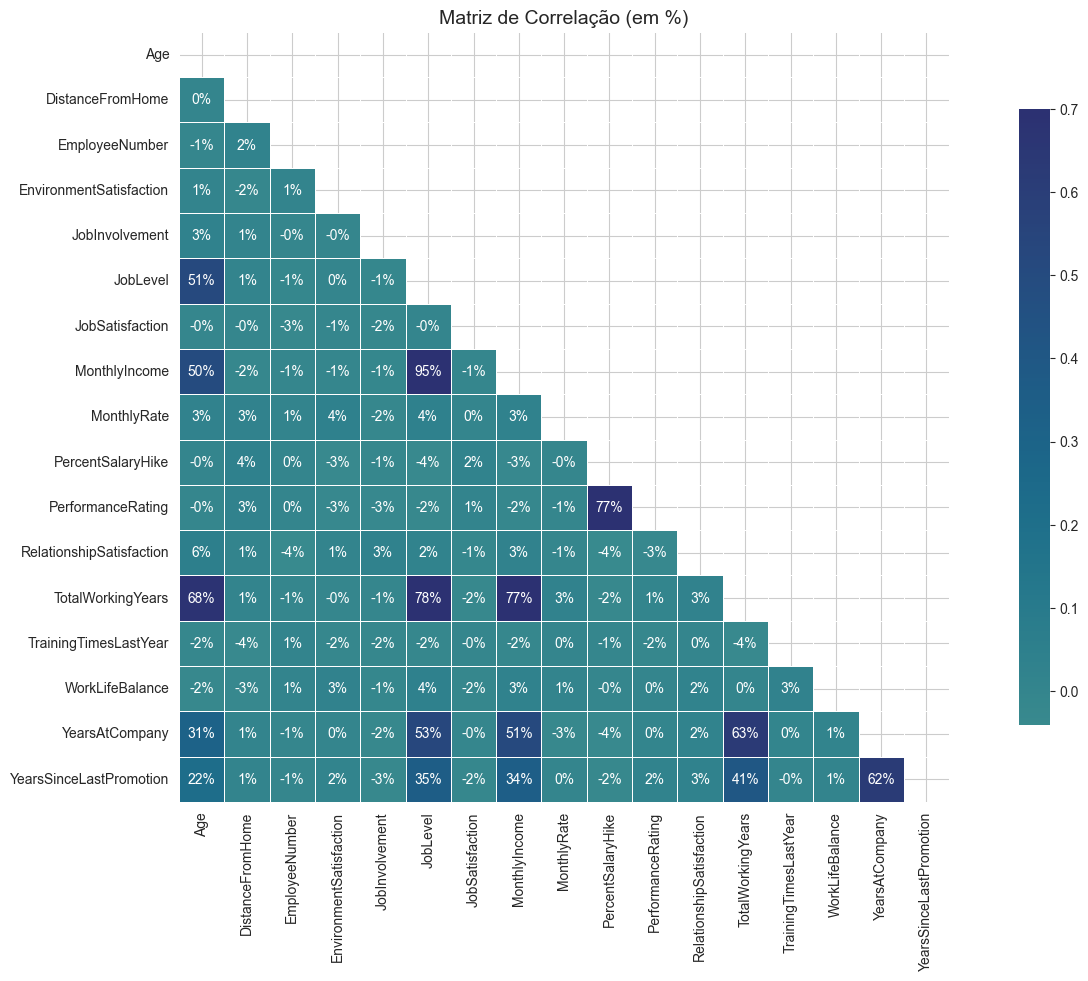

In [26]:
# Calculo da matriz de correlação
corr = numericas.corr()

sns.set_style("whitegrid")

# mask para esconder a metade superior da matriz de correlação
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 10))

# mapa de calor em percentual
sns.heatmap(corr, mask=mask, cmap="crest", vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=True, fmt=".0%")

plt.title('Matriz de Correlação (em %)',fontsize=14)

plt.show()

A maior correlação encontrada foi:
- MonthlyIncome (renda mensal) vs JobLevel (nível de trabalho).

Entretanto, algumas outras variaveis possuem uma relação forte, como:
- TotalWorkingYears (anos de trabalho) vs JobLevel (nível de trabalho)
- PerformanceRating (desempenho do funcionário) vs PercentSalaryHike (taxa de aumento salarial)
- TotalWorkingYears (anos de trabalho) vs MonthlyIncome (renda mensal)

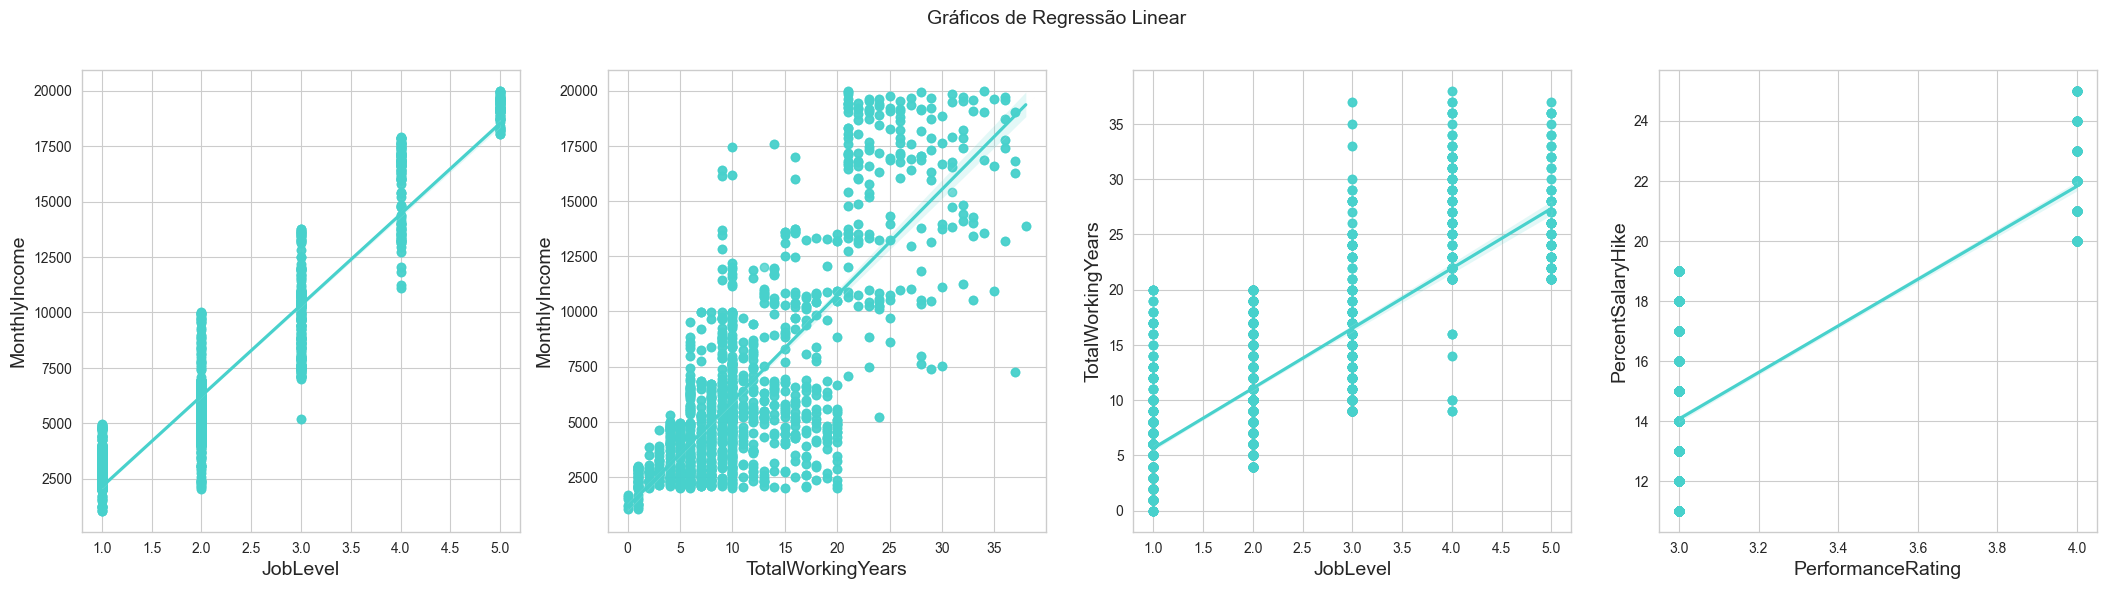

In [27]:
# Gráficos com as maiores correlações representados por uma regressão linear

sns.set_style("whitegrid")

fig, axs = plt.subplots(1, 4, figsize=(26, 6))

# gráfico de regressão para JobLevel vs. MonthlyIncome
sns.regplot(x="JobLevel", y="MonthlyIncome", data=dados_funcionarios, ax=axs[0],color='mediumturquoise')
axs[0].set_xlabel("JobLevel", fontsize=14)
axs[0].set_ylabel("MonthlyIncome", fontsize=14)

# gráfico de regressão para YearsAtCompany vs. MonthlyIncome
sns.regplot(x="TotalWorkingYears", y="MonthlyIncome", data=dados_funcionarios, ax=axs[1],color='mediumturquoise')
axs[1].set_xlabel("TotalWorkingYears", fontsize=14)
axs[1].set_ylabel("MonthlyIncome", fontsize=14)

# gráfico de regressão para JobLevel vs. TotalWorkingYears
sns.regplot(x="JobLevel", y="TotalWorkingYears", data=dados_funcionarios, ax=axs[2],color='mediumturquoise')
axs[2].set_xlabel("JobLevel", fontsize=14)
axs[2].set_ylabel("TotalWorkingYears", fontsize=14)

# gráfico de regressão para PerformanceRating vs. PercentSalaryHike
sns.regplot(x="PerformanceRating", y="PercentSalaryHike", data=dados_funcionarios, ax=axs[3],color='mediumturquoise')
axs[3].set_xlabel("PerformanceRating", fontsize=14)
axs[3].set_ylabel("PercentSalaryHike", fontsize=14)

fig.suptitle("Gráficos de Regressão Linear", fontsize=14)

plt.show()